In [2]:
import pandas as pd

#read given Freelance platform Project dataset
df = pd.read_csv('Freelance Platform Projects.csv') 
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [3]:
df.info() #Detailed inofrmation about dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [4]:
df.shape #Number of rows and columns in datasets (size of dataset)

(12222, 17)

### EDA and Pre Processing

In [5]:
df.isna().sum() #identification of null values /Handeling missing values

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [6]:
df.drop(columns=['Duration','Client Job Title'],inplace=True) #Delete the columns which are not required.

In [7]:
df.columns # show the present columns in dataset

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency'],
      dtype='object')

In [8]:
df.dtypes # Verify the data type of all columns 

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Description                   object
Client Registration Date      object
Client City                   object
Client Country                object
Client Currency               object
dtype: object

In [9]:
obj_cols = df.select_dtypes('object').columns #making array of all columns having object datatype for further encoding
obj_cols

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Location', 'Freelancer Preferred From', 'Type', 'Date Posted',
       'Description', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder 
# change/encode datatype of all columns having object datatype
for col in obj_cols:      
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.dtypes

Title                          int32
Category Name                  int32
Experience                     int32
Sub Category Name              int32
Currency                       int32
Budget                       float64
Location                       int32
Freelancer Preferred From      int32
Type                           int32
Date Posted                    int32
Description                    int32
Client Registration Date       int32
Client City                    int32
Client Country                 int32
Client Currency                int32
dtype: object

<Axes: >

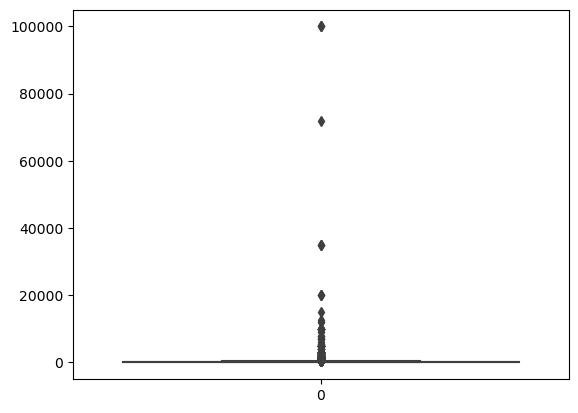

In [11]:
#Check outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Budget'])

In [12]:
#skewness
#it should be less than 5
df['Budget'].skew()

42.455398395555996

In [13]:
#Skewness is handled with boxcox
from scipy.stats import boxcox
df['Budget']=df['Budget']+1
df['Budget']=boxcox(df['Budget']+1)[0]
df['Budget'].skew()

-0.010182795811508298

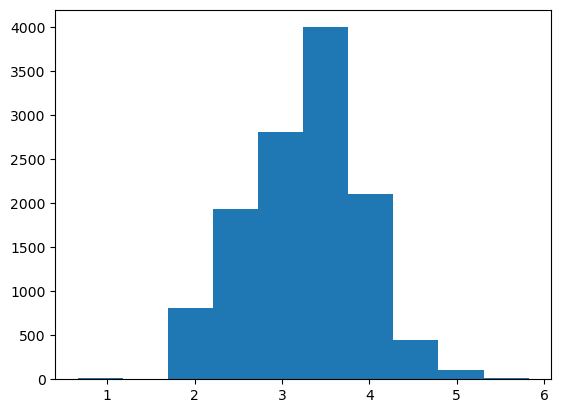

In [14]:
#Histogram for budget
plt.hist(df['Budget'])
plt.show()

<Axes: >

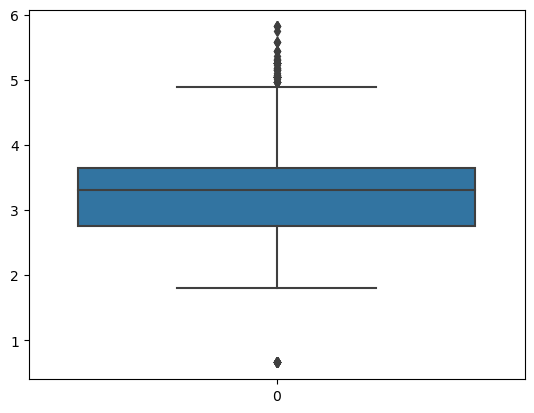

In [15]:
#outliers
sns.boxplot(df['Budget'])

<Axes: >

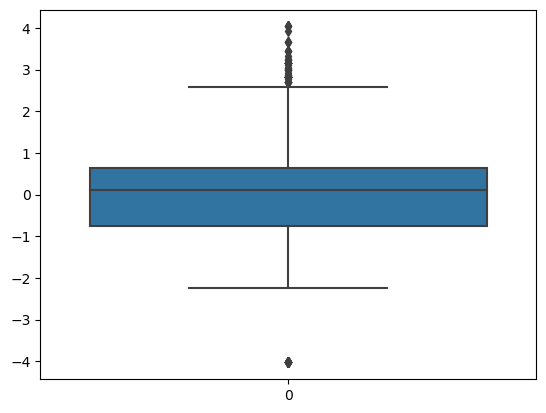

In [16]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Budget']=scaler.fit_transform(df[['Budget']])
sns.boxplot(df['Budget'])

In [17]:
outliers = df[(df['Budget']>2)|(df['Budget']<-2)].index
outliers

Int64Index([    4,     8,    14,    43,    68,    90,   110,   211,   223,
              262,
            ...
            11745, 11816, 11840, 11980, 11985, 11994, 12000, 12038, 12100,
            12204],
           dtype='int64', length=419)

In [18]:
df.drop(outliers, axis=0, inplace=True)

<Axes: >

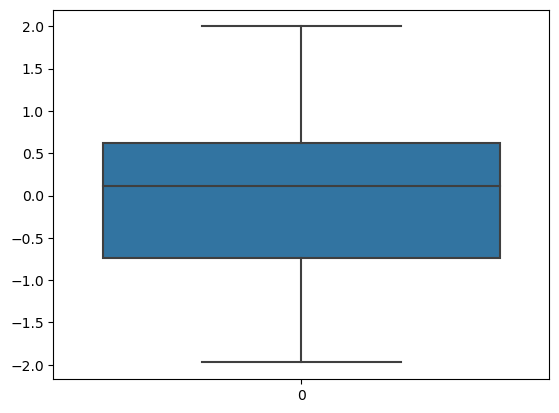

In [19]:
#Boxplot after removing the outliers
sns.boxplot(df['Budget'])

### Clustering

In [20]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,969,1,0,42,0,-0.126639,1,1,0,9407,10434,163,489,61,0
1,6377,7,0,45,1,-1.119263,1,1,0,9406,1247,1441,940,129,1
2,1108,0,0,37,1,-1.598002,1,1,0,9405,2179,3144,940,129,1
3,467,0,0,90,1,-1.453496,1,1,0,9404,2181,3144,940,129,1
5,1818,6,1,26,0,1.497851,1,1,0,9402,568,635,488,128,0


In [21]:
x = df.iloc[:, [1,3]]
x.head()

,Category Name,Sub Category Name
0,1,42
1,7,45
2,0,37
3,0,90
5,6,26


In [22]:
from sklearn.cluster import KMeans

wcss_list = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss = model.inertia_
    wcss_list.append(wcss)
    
wcss_list

C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[12666926.12979754,
 2968200.0282623926,
 1380738.997530869,
 632095.9378084464,
 378612.9302408252,
 272667.5511138319,
 204531.26980313082,
 161517.6818060114,
 133435.3271356151,
 109558.33411088018]

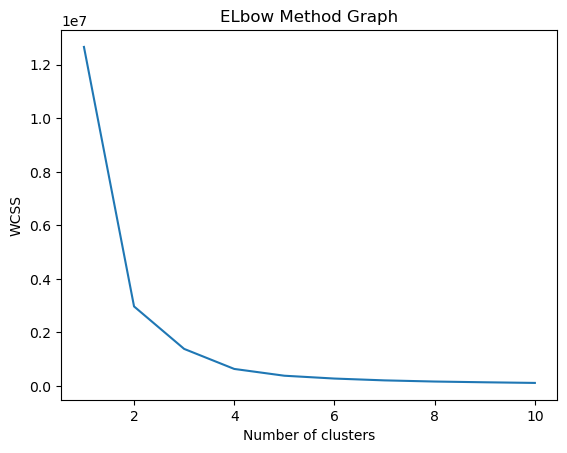

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss_list)
plt.title('ELbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Here Elbow point is 4 since post 4 WCSS is almost constant

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
pred = kmeans.predict(x)
pred[:5]

C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 0, 2])

In [25]:
kmeans.cluster_centers_

array([[ 4.87351054, 98.87167736],
       [ 2.29504685, 45.01311914],
       [ 3.41308793, 14.55657805],
       [ 4.91563675, 72.72649113]])

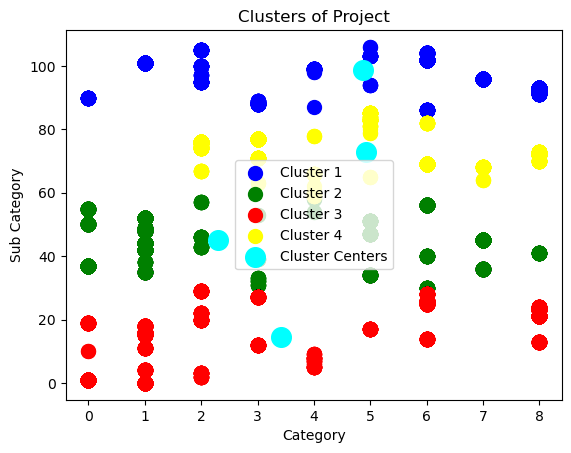

In [26]:
#Plot Clusters for selected columns 

plt.scatter(x.iloc[pred==0, 0], x.iloc[pred==0, 1],
 s=100, c='blue', label='Cluster 1')
plt.scatter(x.iloc[pred==1, 0], x.iloc[pred==1, 1],
 s=100, c='green', label='Cluster 2')
plt.scatter(x.iloc[pred==2, 0], x.iloc[pred==2, 1],
 s=100, c='red', label='Cluster 3')
plt.scatter(x.iloc[pred==3, 0], x.iloc[pred==3, 1],
s=100, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], 
 kmeans.cluster_centers_[:, 1],
 s=200, c='cyan', label='Cluster Centers')
plt.title('Clusters of Project')
plt.xlabel('Category')
plt.ylabel('Sub Category')
plt.legend()

### ML Model Devlopment for Budget prediction - Regression Model

In [27]:
x = df.drop(columns=['Budget'])  # except Budget all colums will be x
y = df['Budget'] # Budget is target variable

In [28]:
from sklearn.model_selection import train_test_split 

# splitting data into training and testing

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                train_size=0.8,
                                                random_state = 4)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)   #training model using linear rgression
trainpred = model.predict(xtrain) 
trainpred[:5]

array([ 0.36030091,  0.47422942, -0.3118427 ,  0.24338406, -1.49944096])

In [30]:
testpred = model.predict(xtest)
testpred[:5] 

array([-0.12662107, -0.16224616, -0.1953412 , -0.29872616,  0.49870007])

In [31]:
from sklearn.metrics import mean_squared_error

err_train = mean_squared_error(ytrain, trainpred)
err_train 

0.476477300520657

In [32]:
err_test = mean_squared_error(ytest, testpred)
err_test

0.46420103315253985

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
x_poly

array([[1.0000e+00, 9.6900e+02, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.3770e+03, 7.0000e+00, ..., 1.6641e+04, 1.2900e+02,
        1.0000e+00],
       [1.0000e+00, 1.1080e+03, 0.0000e+00, ..., 1.6641e+04, 1.2900e+02,
        1.0000e+00],
       ...,
       [1.0000e+00, 8.9270e+03, 6.0000e+00, ..., 1.6641e+04, 1.2900e+02,
        1.0000e+00],
       [1.0000e+00, 2.0570e+03, 1.0000e+00, ..., 1.3456e+04, 4.6400e+02,
        1.6000e+01],
       [1.0000e+00, 1.4070e+03, 0.0000e+00, ..., 1.6641e+04, 1.2900e+02,
        1.0000e+00]])

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)
pred = model.predict(x_poly)
pred

array([-0.63740258, -0.76503025, -0.35965521, ..., -0.33329682,
       -0.33766527,  0.46904335])

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, pred)
mse

0.23994889758687077

In [37]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, pred)
mae

0.3704564839673251

In [38]:
import math

rmse = math.sqrt(mse)
rmse

0.4898457895979823

Here polynomial regression Model gives Lowest Mean squared error hence its a best fit model